In [1]:
# 警告(worning)の非表示化
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install opencv-contrib-python

# 9章 潜在顧客を把握するための画像認識１０本

ここでは、カメラから取得した映像を用いて画像認識を行い、  
必要な情報を取得するための流れを学ぶことで、  
画像認識をビジネス現場で応用するイメージをつかみます。

### ノック８１：画像データを読み込んでみよう

In [3]:
import cv2
# 画像読み込み
img = cv2.imread("img/img01.jpg")
# img.shape: 行数,列数,チャンネル数(色相数)
height, width = img.shape[:2]
print("画像幅: " + str(width))
print("画像高さ: " + str(height))
# 画像の表示
cv2.imshow("img",img)
# google_colabではopenCVの代わりにcv2_imshowを使用する
# from google.colab.patches import cv2_imshow
# cv2_imshow(img)

# 画像を表示し続けるミリ秒数(ウィンドウを閉じるまでなら0を指定)
cv2.waitKey(0)

画像幅: 1920
画像高さ: 1440


-1

### ノック８２：映像データを読み込んでみよう

In [4]:
import cv2

# 情報取得 #
# 映像読み込み
cap = cv2.VideoCapture("mov/mov01.avi")
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH) #幅
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) #高さ
count = cap.get(cv2.CAP_PROP_FRAME_COUNT) #総フレーム数
fps = cap.get(cv2.CAP_PROP_FPS) #FPS
print("画像幅: " + str(width))
print("画像高さ: " + str(height))
print("総フレーム数: " + str(count))
print("FPS: " + str(fps))

# 出力 #
while(cap.isOpened()):
    # frame: 画像情報として扱える
    ret, frame = cap.read()
    if ret:
        cv2.imshow("frame", frame)
    # 全フレームの処理終了or[q]キーで終了
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
# 後処理
cap.release()
cv2.destroyAllWindows()

画像幅: 1920.0
画像高さ: 1440.0
総フレーム数: 401.0
FPS: 30.0


### ノック８３：映像を画像に分割し、保存してみよう

In [ ]:
import cv2
cap = cv2.VideoCapture("mov/mov01.avi")
num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow("frame", frame)
        filepath = "snapshot/snapshot_" + str(num) + ".jpg"
        # 画像書き出し
        cv2.imwrite(filepath,frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    num = num + 1

cap.release()
cv2.destroyAllWindows()

### ノック８４：画像内のどこに人がいるのかを検出してみよう

In [1]:
import cv2

# 準備 #
# HOG特徴量: Histogram of Oriented Gradients(輝度勾配)
# ヒトのシルエットを見て、形の特徴を位置や角度で表現するもの
# 人の認識を簡単に行うために使用

hog = cv2.HOGDescriptor()
# ヒトのモデル情報セット
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

# 検出 #
img = cv2.imread("img/img01.jpg")
# 画像のモノクロ化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 人の検出(位置情報はhumanに格納される)
human, r = hog.detectMultiScale(gray, **hogParams)

if (len(human)>0):
    for (x, y, w, h) in human:
        # 画像に四角形を描く
        cv2.rectangle(img, (x, y), (x + w, y + h), (255,255,255), 3)

# cv2.imshow("img",img)
cv2_imshow(img)
cv2.imwrite("temp.jpg",img)
cv2.waitKey(0)

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'detectMultiScale'
> Overload resolution failed:
>  - 'finalThreshold' is an invalid keyword argument for HOGDescriptor.detectMultiScale()
>  - 'finalThreshold' is an invalid keyword argument for HOGDescriptor.detectMultiScale()


### ノック８５：画像内の人の顔を検出してみよう

In [2]:
import cv2

# 準備
# 正面顔を認識するモデル(横顔や目,鼻などもある)
cascade_file = "haarcascade_frontalface_alt.xml"
# 顔検出にはCascadeClassifierが伝統的に使われている
# 顔検出や個人認証の分野には長い歴史があるため、深掘りして性能比較をしても良いかも
cascade = cv2.CascadeClassifier(cascade_file)

# 検出
img = cv2.imread("img/img02.jpg")
# グレースケール
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 検出の実行
face_list = cascade.detectMultiScale(gray, minSize=(50, 50))

# 検出した顔に印を付ける
for (x, y, w, h) in face_list:
    color = (0, 0, 225)
    pen_w = 3
    cv2.rectangle(img, (x, y), (x+w, y+h), color, thickness = pen_w)

cv2.imshow("img",img)
cv2.imwrite("temp.jpg",img)
cv2.waitKey(0)

-1

### ノック８６：画像内の人がどこに顔を向けているのかを検出してみよう

In [5]:
!pip install dlib

     ---------------------------------------- 3.2/3.2 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for dlib
Failed to build dlib
  Running setup.py install for dlib: started
  Running setup.py install for dlib: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [7 lines of output]
  running bdist_wheel
  running build
  running build_py
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib
  error: subprocess-exited-with-error
  
  Running setup.py install for dlib did not run successfully.
  exit code: 1
  
  [9 lines of output]
  running install
  C:\Users\yujit\anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pi

In [3]:
import cv2
# 顔器官(フェイス・ランドマーク)と言われる目・鼻・口・輪郭を68の特徴点で表現することができる
# 人がどこに顔を向けているか等の細かな情報を検出できる
# 具体的には、輪郭の重心と内側の重心の差から顔の方位を割り出している
# 詳しくは専門書を読む
import dlib
import math

# 準備 #
# 68個の顔器官のモデルの読み込み
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# 正面顔のモデルの読み込み
detector = dlib.get_frontal_face_detector()

# 検出 #
img = cv2.imread("img/img02.jpg")
dets = detector(img, 1)

for k, d in enumerate(dets):
    shape = predictor(img, d)

    # 顔領域の表示
    color_f = (0, 0, 225)
    color_l_out = (255, 0, 0)
    color_l_in = (0, 255, 0)
    line_w = 3
    circle_r = 3
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 1
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_w)
    cv2.putText(img, str(k), (d.left(), d.top()), fontType, fontSize, color_f, line_w)

    # 重心を導出する箱を用意
    num_of_points_out = 17
    num_of_points_in = shape.num_parts - num_of_points_out
    gx_out = 0
    gy_out = 0
    gx_in = 0
    gy_in = 0
    for shape_point_count in range(shape.num_parts):
        shape_point = shape.part(shape_point_count)
        #print("顔器官No.{} 座標位置: ({},{})".format(shape_point_count, shape_point.x, shape_point.y))
        #器官ごとに描画
        if shape_point_count<num_of_points_out:
            cv2.circle(img,(shape_point.x, shape_point.y),circle_r,color_l_out, line_w)
            gx_out = gx_out + shape_point.x/num_of_points_out
            gy_out = gy_out + shape_point.y/num_of_points_out
        else:
            cv2.circle(img,(shape_point.x, shape_point.y),circle_r,color_l_in, line_w)
            gx_in = gx_in + shape_point.x/num_of_points_in
            gy_in = gy_in + shape_point.y/num_of_points_in

    # 重心位置を描画
    cv2.circle(img,(int(gx_out), int(gy_out)),circle_r,(0,0,255), line_w)
    cv2.circle(img,(int(gx_in), int(gy_in)),circle_r,(0,0,0), line_w)

    # 顔の方位を計算
    theta = math.asin(2*(gx_in-gx_out)/(d.right()-d.left()))
    radian = theta*180/math.pi
    print("顔方位:{} (角度:{}度)".format(theta,radian))

    # 顔方位を表示
    if radian<0:
        textPrefix = "   left "
    else:
        textPrefix = "   right "
    textShow = textPrefix + str(round(abs(radian),1)) + " deg."
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_w)


cv2.imshow("img",img)
cv2.imwrite("temp.jpg",img)
cv2.waitKey(0)

ModuleNotFoundError: No module named 'dlib'

### ノック８７：検出した情報を統合し、タイムラプスを作ってみよう

In [7]:
import cv2
# タイムラプス: 数フレームから1フレームのみを取り出した早送り動画
# 目で動画の傾向を簡単に掴むのに適している
# デモ映像としても利用でき、分析結果に対する説得力を高めることにも効果的
print("タイムラプス生成を開始します")

# 映像取得 #
cap = cv2.VideoCapture("mov/mov01.avi")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# hog宣言 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

# タイムラプス作成 #
movie_name = "timelapse.avi"
# VideoWriter_fourcc: 動画ファイル作成
# FourCCと呼ばれる動画のデータフォーマットを識別する四文字を指定し、任意の形式の動画ファイルを作成する
# 下記はAVI形式
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
video = cv2.VideoWriter(movie_name,fourcc, 30, (width,height))

num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        # 10フレームごとに保存
        if (num % 10 == 0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            # フレームを格納
            video.write(frame)
    else:
        break
    num = num + 1
video.release()
# 動画の生成
cap.release()
cv2.destroyAllWindows()
print("タイムラプス生成を終了しました")

タイムラプス生成を開始します


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'detectMultiScale'
> Overload resolution failed:
>  - Argument 'hitThreshold' can not be treated as a double
>  - Argument 'hitThreshold' can not be treated as a double


### ノック８８：全体像をグラフにして可視化してみよう

In [8]:
import cv2
import pandas as pd

print("分析を開始します")
# 映像取得 #
cap = cv2.VideoCapture("mov/mov01.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

# hog宣言 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

num = 0
list_df = pd.DataFrame( columns=['time','people'] )
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num % 10 == 0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            # フレーム番号/fps(=秒数), ヒトの数
            tmp_se = pd.Series([num / fps, len(human)], index=list_df.columns)
            list_df = list_df.append( tmp_se, ignore_index=True )       
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    else:
        break
    num = num + 1
cap.release()
cv2.destroyAllWindows()
print("分析を終了しました")

分析を開始します


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'detectMultiScale'
> Overload resolution failed:
>  - 'finalThreshold' is an invalid keyword argument for HOGDescriptor.detectMultiScale()
>  - 'finalThreshold' is an invalid keyword argument for HOGDescriptor.detectMultiScale()


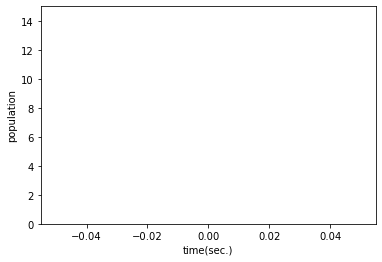

In [9]:
import matplotlib.pyplot as plt
# 時間経過による人数の変化
plt.plot(list_df["time"], list_df["people"])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.show()

### ノック８９：人通りの変化をグラフで確認しよう

In [10]:
import cv2
import pandas as pd

print("分析を開始します")
# 映像取得 #
cap = cv2.VideoCapture("mov/mov02.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

# hog宣言 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

num = 0
list_df2 = pd.DataFrame( columns=['time','people'] )
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            tmp_se = pd.Series( [num/fps,len(human) ], index=list_df.columns )
            list_df2 = list_df2.append( tmp_se, ignore_index=True )       
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    else:
        break
    num = num + 1
cap.release()
cv2.destroyAllWindows()
print("分析を終了しました")

分析を開始します


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'detectMultiScale'
> Overload resolution failed:
>  - 'finalThreshold' is an invalid keyword argument for HOGDescriptor.detectMultiScale()
>  - 'finalThreshold' is an invalid keyword argument for HOGDescriptor.detectMultiScale()


In [ ]:
import matplotlib.pyplot as plt
plt.plot(list_df2["time"], list_df2["people"])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.show()

### ノック９０：移動平均を計算することでノイズの影響を除去しよう

In [13]:
# hogで分析したデータはノイズが多い
# ある程度の時間の平均(移動平均)を計算することでノイズの影響を軽減する

import numpy as np
def moving_average(x, y):
    # np.convolve: 畳み込み積分,移動平均
    y_conv = np.convolve(y, np.ones(5)/float(5), mode='valid')
    # np.convolve: 等差数列を作成する関数(開始,終了,数)
    x_dat = np.linspace(np.min(x), np.max(x), np.size(y_conv))
    return x_dat, y_conv

ValueError: v cannot be empty

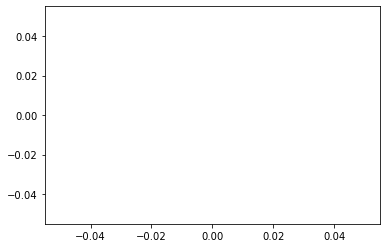

In [12]:
plt.plot(list_df["time"], list_df["people"], label="raw")
ma_x, ma_y = moving_average(list_df["time"], list_df["people"])
plt.plot(ma_x,ma_y, label="average")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.legend()
plt.show()

In [ ]:
plt.plot(list_df2["time"], list_df2["people"], label="raw")
ma_x2, ma_y2 = moving_average(list_df2["time"], list_df2["people"])
plt.plot(ma_x2,ma_y2, label="average")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.legend()
plt.show()

In [ ]:
plt.plot(ma_x,ma_y, label="1st")
plt.plot(ma_x2,ma_y2, label="2nd")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.legend()
plt.show()